In [44]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2
%load_ext lab_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


# Batched Weighted Mean

How can we calculate a weighted mean in a batched process. So lets load some data for example

In [3]:
!ls /home/raichu/data/data/binaries-trk-100/

b-0-trk-pt.bin		b-49-trk-pt.bin		b-88-trk-mc.bin
b-0-trk-z0.bin

0-0-reconVertices.bin	b-48-trk-pt.bin		b-87-trk-mc.bin
0-1-reconVertices.bin	b-48-trk-z0.bin		b-87-trk-pt.bin
b-0-recon-pt.bin	b-49-recon-pt.bin	b-87-trk-z0.bin
b-0-reconVertices.bin	b-49-reconVertices.bin	b-88-recon-pt.bin
b-0-recon-z0.bin	b-49-recon-z0.bin	b-88-reconVertices.bin
b-0-trk-fake.bin	b-49-trk-fake.bin	b-88-recon-z0.bin
b-0-trk-mc.bin		b-49-trk-mc.bin		b-88-trk-fake.bin
b-0-trk-pt.bin		b-49-trk-pt.bin		b-88-trk-mc.bin
b-0-trk-z0.bin		b-49-trk-z0.bin		b-88-trk-pt.bin
b-10-recon-pt.bin	b-4-recon-pt.bin	b-88-trk-z0.bin
b-10-reconVertices.bin	b-4-reconVertices.bin	b-89-recon-pt.bin
b-10-recon-z0.bin	b-4-recon-z0.bin	b-89-reconVertices.bin
b-10-trk-fake.bin	b-4-trk-fake.bin	b-89-recon-z0.bin
b-10-trk-mc.bin		b-4-trk-mc.bin		b-89-trk-fake.bin
b-10-trk-pt.bin		b-4-trk-pt.bin		b-89-trk-mc.bin
b-10-trk-z0.bin		b-4-trk-z0.bin		b-89-trk-pt.bin
b-11-recon-pt.bin	b-50-recon-pt.bin	b-89-trk-z0.bin
b-11-reconVertices.bin	b-50-reconVertices.bin	b-8-recon-pt.bin
b-11-recon-z0.bin	b-50-reco

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
storage = "/home/raichu/data/data/binaries-trk-100/"
trk = np.fromfile(storage + "b-0-trk-z0.bin", dtype=np.float32)
pt = np.fromfile(storage + "b-0-trk-pt.bin", dtype=np.float32)

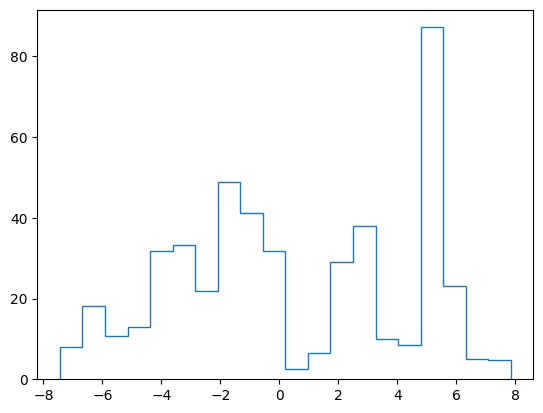

In [13]:
h, be, _ = plt.hist(trk, bins=20, weights=pt, histtype="step")

In [14]:
x = 0.5 * (be[1:] + be[:-1])

In [27]:
top = np.sum(h * x)

In [28]:
bottom = np.sum(h)

In [29]:
top / bottom

0.43439783903059104

In [30]:
trk1 = trk[:59]
trk2 = trk[59:]
pt1 = pt[:59]
pt2 = pt[59:]

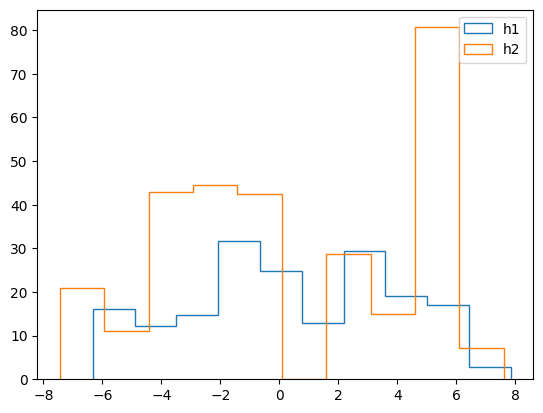

In [40]:
h1, be1, _ = plt.hist(trk1, bins=10, weights=pt1, histtype="step", label="h1")
h2, be2, _ = plt.hist(trk2, bins=10, weights=pt2, histtype="step", label="h2")
x1 = 0.5 * (be1[1:] + be1[:-1])
x2 = 0.5 * (be2[1:] + be2[:-1])
plt.legend()

In [41]:
top1 = np.sum(h1 * x1)
top2 = np.sum(h2 * x2)
bottom1 = np.sum(h1)
bottom2 = np.sum(h2)

In [42]:
top1, top2, bottom1, bottom2

(78.70399307040498, 126.10909001575783, 180.82379126548767, 293.0247483253479)

In [43]:
(top1 + top2) / (bottom1 + bottom2)

0.432233226387101